# Demo - Basic SNR Calculation

This demo shows how you can use `LEGWORK` to compute the SNR of a single binary system, as well as a collection of systems.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

import sys
sys.path.append("../../")

import legwork as lw

In [3]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.7 * fs,
          'ytick.labelsize': 0.7 * fs}
plt.rcParams.update(params)

## Single source SNR calculation

The most basic use case of LEGWORK is to calculate the signal-to-noise ratio for a single stellar-mass binary system. Let's create a toy source and calculate its SNR.

In [4]:
source = lw.source.Source(m_1=10 * u.Msun,
                          m_2=10 * u.Msun,
                          ecc=0.2,
                          f_orb=1e-4 * u.Hz,
                          dist=8 * u.kpc,
                          interpolate_g=False)

In [5]:
source.get_snr()

array([4.49425701])

That's it! Behind the scenes LEGWORK has checked whether the source is eccentric/circular and evolving/stationary and picked the fastest possible way to calculate the SNR accurately.

## Population of sources SNR calculation

In [17]:
n = 10
sources = lw.source.Source(m_1=[10, 10, 10] * u.Msun,
                           m_2=[10, 10, 10] * u.Msun,
                           ecc=[0, 0.5, 0.7],
                           f_orb=[1e-3, 1e-4, 1e-5] * u.Hz,
                           dist=[8, 8, 8] * u.kpc,
                           interpolate_g=False)

In [19]:
sources.get_merger_time().to(u.Myr)

<Quantity [8.76477045e-03, 1.45561134e+00, 1.78432313e+02] Myr>

In [20]:
sources.evolve_sources(1 * u.Myr)

In [21]:
sources.f_orb

<Quantity [0.00000000e+00, 1.93294717e-04, 1.00543937e-05] Hz>

/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


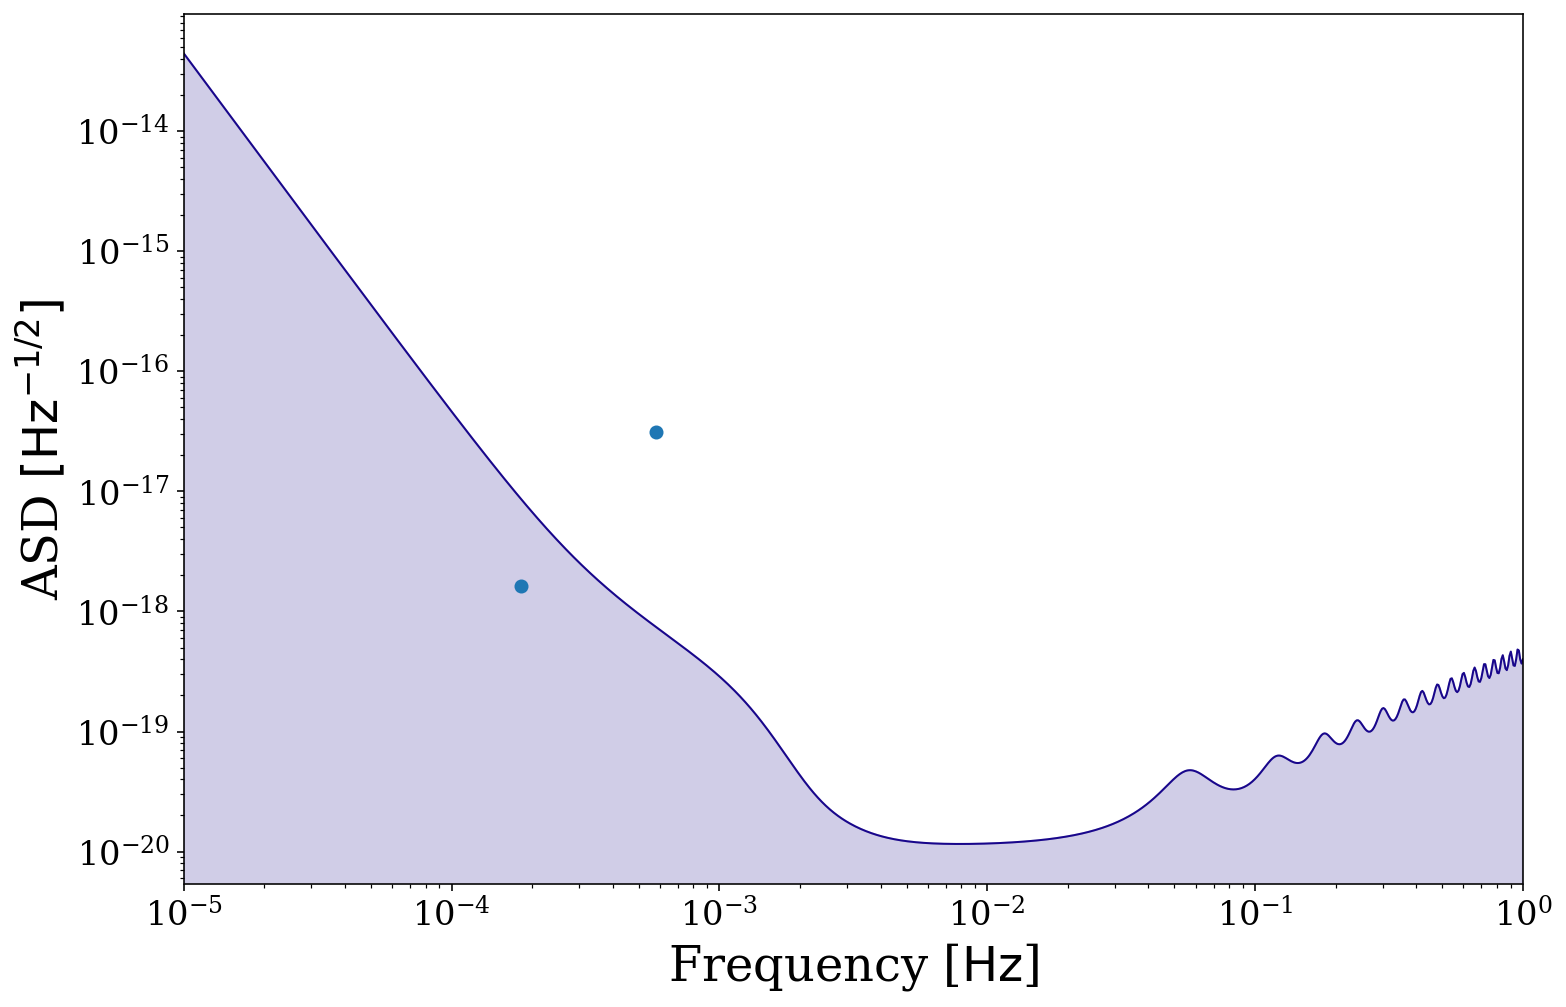

/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Frequency [$\\rm Hz$]', ylabel='ASD $[\\rm Hz^{-1/2}]$'>)

In [24]:
sources.get_snr()
sources.plot_sources_on_sc()